# Ultimate Challenge Part 3

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We need a way of reading a JSON file with explicit NaN values in it: https://stackoverflow.com/q/29875244
text = open('ultimate_data_challenge.json', 'r')
x = text.read()
y = json.loads(x)
ultimate_pdf = pd.DataFrame(y)

In [3]:
ultimate_pdf

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [4]:
ultimate_pdf.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [5]:
ultimate_pdf['no_rating_of_driver'] = ultimate_pdf['avg_rating_of_driver'].isna()
ultimate_pdf['no_rating_by_driver'] = ultimate_pdf['avg_rating_by_driver'].isna()

In [6]:
ultimate_pdf['signup_date'] = pd.to_datetime(ultimate_pdf['signup_date'])
ultimate_pdf['last_trip_date'] = pd.to_datetime(ultimate_pdf['last_trip_date'])

In [7]:
ultimate_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  no_rating_of_driver     50000 non-null  bool  

In [8]:
retained_date = ultimate_pdf.last_trip_date.max() - pd.to_timedelta('30day')

In [9]:
ultimate_pdf['retained'] = (ultimate_pdf['last_trip_date'] > retained_date) * 1

In [10]:
ultimate_pdf

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,no_rating_of_driver,no_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,False,False,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,False,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,False,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,False,False,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,False,False,1
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,True,False,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,False,False,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,False,False,0


In [11]:
ultimate_pdf.retained.mean()

0.3662

In [12]:
ultimate_pdf.groupby("phone").retained.mean()

phone
Android    0.195846
iPhone     0.440634
Name: retained, dtype: float64

In [13]:
ultimate_pdf.groupby("ultimate_black_user").retained.mean()

ultimate_black_user
False    0.287388
True     0.496393
Name: retained, dtype: float64

In [14]:
ultimate_pdf.groupby('city').retained.mean()

city
Astapor           0.243256
King's Landing    0.622606
Winterfell        0.342004
Name: retained, dtype: float64

In [15]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set(font_scale=1.5)

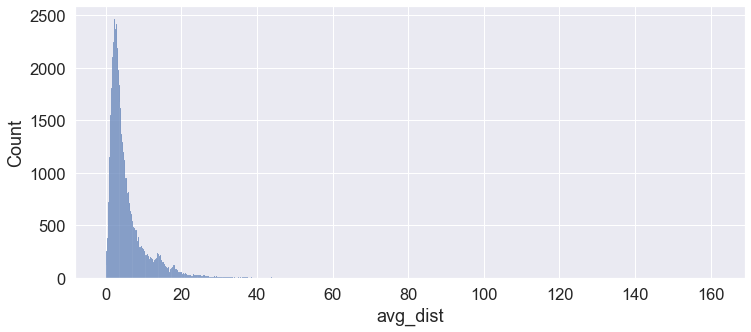

In [16]:
sns.histplot(data=ultimate_pdf, x="avg_dist")

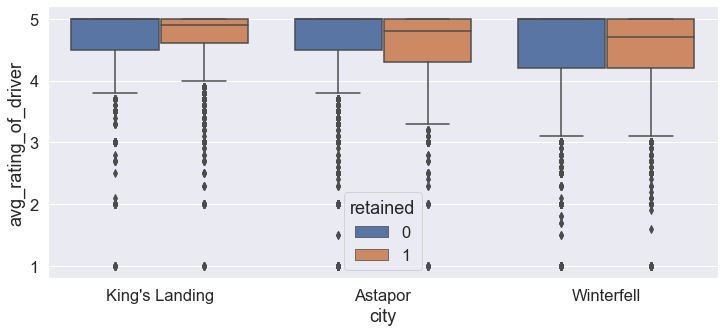

In [17]:
sns.boxplot(x="city", y="avg_rating_of_driver",
            hue="retained", 
            data=ultimate_pdf)

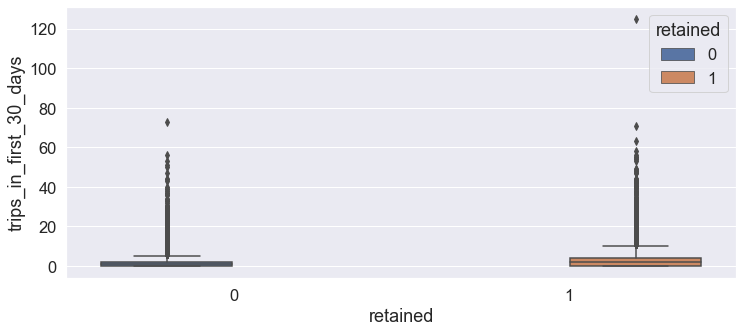

In [18]:
sns.boxplot( x="retained", y="trips_in_first_30_days",
            hue="retained", 
            data=ultimate_pdf)

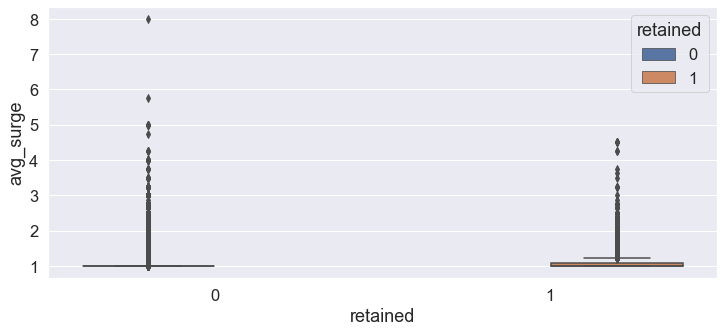

In [19]:
sns.boxplot( x="retained", y="avg_surge",
            hue="retained", 
            data=ultimate_pdf)

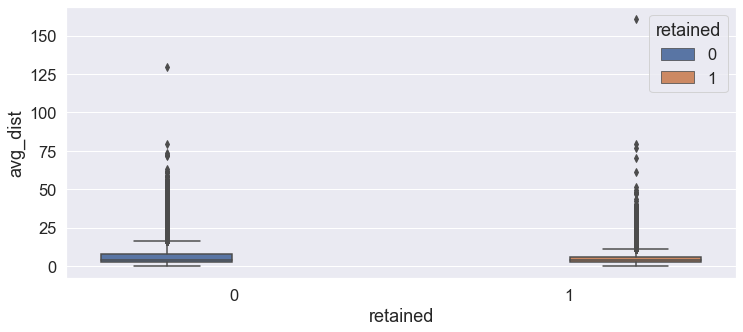

In [20]:
sns.boxplot( x="retained", y="avg_dist",
            hue="retained", 
            data=ultimate_pdf)

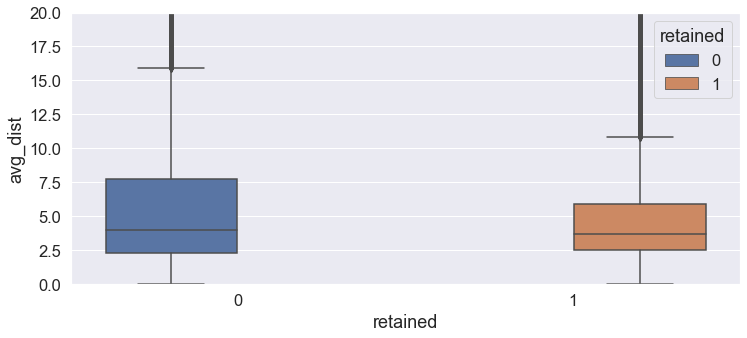

In [21]:
ax = sns.boxplot( x="retained", y="avg_dist",
            hue="retained", 
            data=ultimate_pdf)
ax.set(ylim=(0,20))
plt.show()

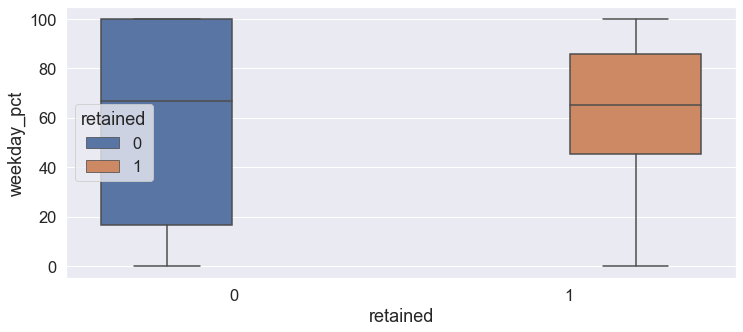

In [22]:
sns.boxplot( x="retained", y="weekday_pct",
            hue="retained", 
            data=ultimate_pdf)

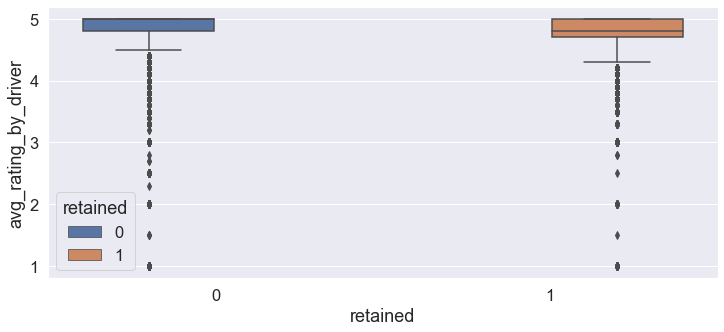

In [23]:
sns.boxplot( x="retained", y="avg_rating_by_driver",
            hue="retained", 
            data=ultimate_pdf)

In [24]:
ultimate_pdf = ultimate_pdf[ultimate_pdf.no_rating_of_driver == False]
ultimate_pdf = ultimate_pdf[ultimate_pdf.no_rating_by_driver == False]

In [25]:
ultimate_pdf.count()

city                      41744
trips_in_first_30_days    41744
signup_date               41744
avg_rating_of_driver      41744
avg_surge                 41744
last_trip_date            41744
phone                     41445
surge_pct                 41744
ultimate_black_user       41744
weekday_pct               41744
avg_dist                  41744
avg_rating_by_driver      41744
no_rating_of_driver       41744
no_rating_by_driver       41744
retained                  41744
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [27]:
ultimate_pdf.avg_rating_by_driver.fillna(5, inplace=True)
ultimate_pdf.avg_rating_of_driver.fillna(4.9, inplace=True)

In [28]:
ultimate_pdf

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,no_rating_of_driver,no_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,False,False,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,False,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,False,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,False,False,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,False,False,1
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,False,False,0
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,False,False,1
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,False,False,0


In [29]:
ultimate_pdf['ultimate_black_user'] = ultimate_pdf['ultimate_black_user'] * 1

In [30]:
ultimate_pdf['phone_is_iphone'] = (ultimate_pdf['phone'] == 'iPhone') * 1

In [31]:
ultimate_pdf

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,no_rating_of_driver,no_rating_by_driver,retained,phone_is_iphone
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,False,False,1,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,False,False,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,False,False,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,False,False,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,1,55.6,2.53,4.7,False,False,1,1
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,0,25.0,2.25,4.5,False,False,0,1
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,0,100.0,5.63,4.2,False,False,1,1
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,1,100.0,3.86,5.0,False,False,0,0


In [32]:
label_encoder = LabelEncoder()
ultimate_pdf['city_id'] = label_encoder.fit_transform(ultimate_pdf['city'])

In [33]:
ultimate_pdf

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,no_rating_of_driver,no_rating_by_driver,retained,phone_is_iphone,city_id
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,False,False,1,1,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,False,False,0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,False,False,0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,False,False,1,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,False,False,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,1,55.6,2.53,4.7,False,False,1,1,0
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,0,25.0,2.25,4.5,False,False,0,1,0
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,0,100.0,5.63,4.2,False,False,1,1,1
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,1,100.0,3.86,5.0,False,False,0,0,2


In [34]:
features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_rating_by_driver', 
            'avg_surge', 'surge_pct', 'ultimate_black_user', 
            'weekday_pct', 'avg_dist', 'city_id', 'phone_is_iphone']

In [35]:
X = ultimate_pdf[features]
y = ultimate_pdf['retained']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23)

In [37]:
param_grid = {'n_estimators': [50, 100, 200, 400],
              'max_depth': [2, 5, 8, None],
              'min_samples_leaf': [5, 10, 40, 100],
              'criterion': ['gini', 'entropy']
             }


classifier = RandomForestClassifier()
cv = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, verbose=5)
cv.fit(X_train, y_train)
best_estimator = cv.best_estimator_

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.4min finished


In [38]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 10,
 'n_estimators': 200}

In [39]:
best_estimator.score(X_train, y_train)

0.8258721365473873

In [40]:
best_estimator.score(X_test, y_test)

0.7839262187088274

In [41]:
sorted(list(zip(features, best_estimator.feature_importances_)), key=lambda x: -x[1])

[('avg_rating_by_driver', 0.1547200009888241),
 ('weekday_pct', 0.13528879601782862),
 ('city_id', 0.13042528268336734),
 ('avg_dist', 0.12236850213574559),
 ('surge_pct', 0.11918040192976867),
 ('avg_surge', 0.08512063893109567),
 ('phone_is_iphone', 0.07587207436062295),
 ('trips_in_first_30_days', 0.06747935737222774),
 ('ultimate_black_user', 0.06059231894783489),
 ('avg_rating_of_driver', 0.04895262663268449)]

In [42]:
y_train_predict = best_estimator.predict(X_train)
y_test_predict = best_estimator.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from rfpimp import permutation_importances

/opt/anaconda3/envs/springboard4/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
print(accuracy_score(y_train, y_train_predict), 
      precision_score(y_train, y_train_predict), 
      recall_score(y_train, y_train_predict))

0.8258721365473873 0.809894340240806 0.7389030040352712


In [45]:
print(accuracy_score(y_test, y_test_predict), 
      precision_score(y_test, y_test_predict), 
      recall_score(y_test, y_test_predict))

0.7839262187088274 0.757 0.6787208607292289


In [46]:
def score_func(rf, X_train, y_train):
    return accuracy_score(y_train, rf.predict(X_train))

In [47]:
importances = permutation_importances(best_estimator, X_train, y_train, score_func)

In [48]:
importances.sort_values('Importance', ascending=False)

,Importance
Feature,
city_id,0.0644
avg_rating_by_driver,0.0554
weekday_pct,0.0462
phone_is_iphone,0.0414
ultimate_black_user,0.0320
avg_dist,0.0282
surge_pct,0.0270
trips_in_first_30_days,0.0224
avg_rating_of_driver,0.0168
